#<h1>**Geo-Conversion: Points to Polygons**</h1>

#####In the region of **Bahawalnagar, Pakistan**, a significant geospatial initiative unfolds. The objective is to advance agricultural precision and land management through the conversion of point data to polygons, reshaping the way we understand crop cultivation.

## Project Overview

At its core, this project aims to replace individual data points with polygons, creating a more comprehensive representation of farm lands. Over **18,000 meticulously placed data points** serve as the foundation. These points correspond to **Kharif crops for the tenure of 2023 - 2024**, including maize, rice, fodder, cotton, and sugarcane. Our endeavor is to annotate farmlands with these specific crop types, painting a clearer picture of the landscape.

## Challenges and Significance

The essence of this endeavor lies in the transformation — converting isolated points into enclosed polygons. This shift enables us to precisely define farm boundaries and crop areas. This conversion holds the potential to considerably improve monitoring, planning, and resource allocation practices in agriculture.

## Benefits and Applications

The implications of this transformation are far-reaching. By representing farm lands as polygons, the project equips farmers, land managers, and policymakers with comprehensive insights for decision-making. The newfound polygons become invaluable tools for crop analysis, yield prediction, resource optimization, and strategic land-use planning.

## Conclusion

In the heart of **Bahawalnagar, Pakistan**, this geospatial journey stands as a testament to the fusion of technology and agricultural understanding. The conversion of point data to polygons marks a pivotal step towards more informed and precise agriculture practices. Stay tuned as we explore the technical aspects and methodologies behind this transformation.




#<h2>**Segment-Geospatial Library**</h2>

The `segment-geospatial` library is a powerful toolkit designed to elevate your geospatial analysis projects. With a focus on segmentation tasks, this library equips you with versatile modules and functions to unravel the hidden patterns within spatial data.

<h3> Key Features: <h3>

- **Image Segmentation**: Seamlessly divide satellite images or aerial photographs into meaningful segments. Uncover hidden insights by analyzing color, texture, and visual properties.

- **Vector Data Segmentation**: Transform geographic vector data, such as shapefiles or GeoJSON files, into distinct spatial segments. Utilize this segmentation to better understand your geographical information.

- **Spatial Clustering**: Group geographic points or features based on their spatial relationships. This enables efficient exploration and analysis of spatial patterns.

- **Geospatial Analysis**: Harness a range of analytical operations for geospatial datasets. Conduct spatial queries, buffering, overlay operations, and more to gain deeper insights into your data.

- **Machine Learning Integration**: Seamlessly integrate machine learning techniques for geospatial data analysis. Train models for tasks like land cover classification, object detection, or even anomaly detection.

Empower your geospatial analysis projects with the `segment-geospatial` library and unlock a new realm of insights in the world of spatial data.



In [1]:
%%capture
%pip install segment-geospatial

#<h2> **Importing Required libraries for SAM (Segment Anything Model) and data processing & management.**



<h3>Imported libraries details</h3>

- **SamGeo**: A class from the `samgeo` module used for spatial analysis using a specific model.

- **tms_to_geotiff**: A function from the `samgeo` module used for converting TMS tiles to GeoTIFF images.

- **geopandas**: A library for working with geospatial data.

- **pandas**: A library for data manipulation and analysis.

- **files**: A module from the `google.colab` library used for working with files in Google Colab.

<h3>Create SamGeo Instance</h3>

To perform spatial analysis, we'll create an instance of the `SamGeo` class with specific parameters.

```python
# Create an instance of the SamGeo class with specified parameters
sam = SamGeo(
    model_type="vit_h",                 # Specify the model type (in this case, "vit_h")
    checkpoint="sam_vit_h_4b8939.pth",  # Specify the checkpoint file for the model
    automatic=False,                    # Set automatic processing to False
    sam_kwargs=None                     # Additional keyword arguments for the SamGeo instance (None in our case).
)


In [3]:
%%capture
import os

from samgeo import SamGeo, tms_to_geotiff

import geopandas as gpd

import pandas as pd

from google.colab import files

sam = SamGeo(
      model_type="vit_h",
      checkpoint="sam_vit_h_4b8939.pth",
      automatic=False,
      sam_kwargs=None,
    )

# At this point, the SamGeo instance 'sam' is created and configured.
# It can be used to perform image analysis using the specified model and checkpoint.


#<h2>**Data Requirement and Organization**</h2>

<strong>1. Acquiring Data:</strong>
Start by obtaining a dataset that contains essential information:
- <strong>Bounding Box Coordinates:</strong> These define the area encompassing the points for processing. They set the spatial boundaries of the region in focus.
- <strong>Latitudes and Longitudes:</strong> These pinpoint exact positions of each data point on the geographical map.

<strong>2. Data Organization:</strong>
To streamline the process, structure your data in CSV format:
- Use the column labeled '<strong>box_cords</strong>' for bounding box coordinates.
- Put latitudes in the '<strong>Latitude</strong>' column.
- Record longitudes in the '<strong>Longitude</strong>' column.

By following these straightforward steps of data acquisition and proper organization within a CSV file, you'll be equipped to seamlessly proceed with the geospatial analysis workflow.

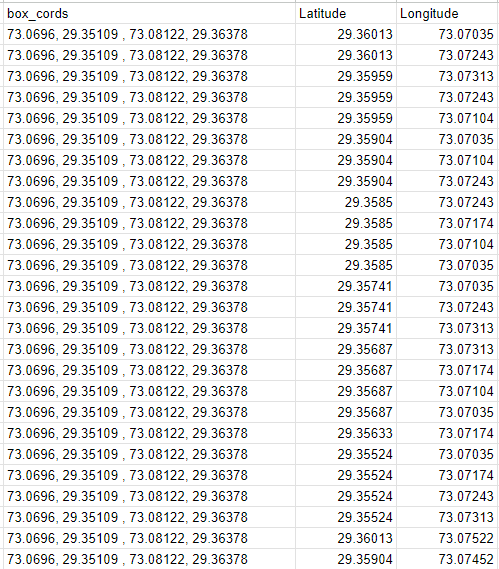
</div>


<div style="background-color: #f9f9f9; border: 1px solid #e0e0e0; padding: 20px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
<h2 style="color: #1976D2;">
📊 Transforming CSV data into geographic insights.</h2>

<strong>1. Uploading CSV Data File:</strong>
Begin by uploading your CSV data file to the "content" folder within the Colab directory. This folder serves as a repository for the data files you'll be working with.

<strong>2. Providing File Name:</strong>
In the subsequent code lines, you'll need to specify the name of the CSV file containing your dataset. Locate the line of code marked with "<strong>input_file_name =</strong>" and fill in the name of your file
```python
input_file_name =     # Enter the name of the .csv file containing the coordinates of bounding box, latitude, longitude.
```

Now, let's delve into the code snippet and unravel its essence:

- <strong>Basic initialization</strong>
We start by initializing a variable, <strong>prev_bbox</strong>, as well as a list named <strong>gdf_list</strong>, which will be employed later to store GeoDataFrames.
```python
prev_bbox = 0
gdf_list = []
```

Next, we embark on the journey of data extraction and processing:

- <strong>Reading Data:</strong> The path to the CSV file is constructed using the provided file name. Bounding box coordinates, latitudes, and longitudes are extracted from their respective columns.
```python
#Setting the .csv file path.  
file_path = f"/content/{input_file_name}.csv"
```
```python
#Specifyin the column names.
bbox_column_name = "box_cords"
lat_column_name = "Latitude"  # Change this to the actual column name for latitude.
lon_column_name = "Longitude"  # Change this to the actual column name for longitude.
```
```python
# Read the data from .csv file
df = pd.read_csv(file_path)
bboxes = [[float(coord) for coord in bbox.split(',')] for bbox in df[bbox_column_name]]
latitudes = df[lat_column_name].tolist()
longitudes = df[lon_column_name].tolist()

- <strong>Data Points Formation:</strong> Combining the latitudes and longitudes, we form data points—each a tuple that signifies a location on the map.
```python
# Combine latitudes and longitudes into tuples
data_points = [[[lon, lat]] for lon, lat in zip(longitudes, latitudes)]


In this elegant process, data is transformed from raw CSV format to meaningful coordinates, required for the operation of geo-SAM model. Follwing will be the format of acquired data :
- bbox : [72.33326, 29.08553, 72.34211, 29.0952]
- point : [[72.3342, 29.0945]]
</div>


In [4]:
input_file_name = 'demo data'        # Enter the name of the .csv file containing the coordinates of bounding box, latitude, longitude.
prev_bbox = 0
gdf_list = []

#Setting the .csv file path.
file_path = f"/content/{input_file_name}.csv"

#Specifyin the column names.
bbox_column_name = "box_cords"
lat_column_name = "Latitude"  # Change this to the actual column name for latitude.
lon_column_name = "Longitude"  # Change this to the actual column name for longitude.

# Read the data from .csv file
df = pd.read_csv(file_path)
bboxes = [[float(coord) for coord in bbox.split(',')] for bbox in df[bbox_column_name]]
latitudes = df[lat_column_name].tolist()
longitudes = df[lon_column_name].tolist()

# Combine latitudes and longitudes into tuples
data_points = [[[lon, lat]] for lon, lat in zip(longitudes, latitudes)]

#<h2>**Processing Data Points**</h2>


In this section of the code, we dive into the heart of data processing by iterating through the data points and performing a series of operations:

<strong>Loop Through Data Points:</strong>
Using the <code>enumerate()</code> function, we iterate over each data point and its corresponding index.

```python
for i, point in enumerate(data_points):
```
<strong>Extracting Data:</strong>
We extract the block and bounding box (bbox) for the current data point. The <code>block</code> and <code>bbox</code> will be used for further processing.

```python
  block = blocks[i]
  bbox = bboxes[i]
```
<strong>Bounding Box Check:</strong>
We compare the current <code>bbox</code> with the previous one (<code>prev_bbox</code>). If they are not the same, it indicates a new bounding box, and we proceed to the next steps.

```python
  if bbox != prev_bbox:
    prev_bbox = bboxes[i]
```
<strong>Generating GeoTIFF Image:</strong>
We generate a GeoTIFF image using the provided <code>tms_to_geotiff()</code> function. This image will be used for further analysis, and it is based on the specified bounding box, zoom level, and source.

```python
    image = "satellite.tif"
    tms_to_geotiff(output=image, bbox=bbox, zoom=17, source="Satellite", overwrite=True)
    sam.set_image(image)
```
<strong>Prediction and Vectorization:</strong>
We set the output file names for the predicted GeoTIFF and the generated GeoPackage (gpkg) file.

```python
  output.tif_file_name = f"mask_{i}.tif"
  output.gpkg_file_name = f"mask{i}.gpkg"
  ```
Using the <code>sam.predict()</code> function, we perform prediction on the current point and specify its CRS. This will generate a predicted GeoTIFF file.

```python
  sam.predict(point, point_labels=i, point_crs="EPSG:4326", output=output.tif_file_name)
  ```
Next, we convert the predicted GeoTIFF to a vector format using the <code>sam.tiff_to_vector()</code> function, generating a GeoPackage file.

```python
  sam.tiff_to_vector(output.tif_file_name, output.gpkg_file_name)
  ```
<strong>Generating GeoDataFrame:</strong>
We read the generated GeoPackage file into a GeoDataFrame using <code>gpd.read_file()</code> and store it as <code>current_gdf</code>.

```python
  current_gdf = gpd.read_file(output.gpkg_file_name)
```
<strong>Appending to GeoDataFrame List:</strong>
We append the <code>current_gdf</code> GeoDataFrame to the <code>gdf_list</code>, which will be used to merge all the GeoDataFrames later.

```python
  gdf_list.append(current_gdf)
```
<strong>Merging GeoDataFrames:</strong>
After the loop, we merge all the GeoDataFrames in the <code>gdf_list</code> into a single GeoDataFrame named <code>merged_gdf</code> using <code>pd.concat()</code>.

```python
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))
```
<strong>Saving and Downloading:</strong>
We save the <code>merged_gdf</code> GeoDataFrame as a single GeoPackage file and download it.

```python
merged_output_file = f"merged_output_{input_file_name}.gpkg"
merged_gdf.to_file(merged_output_file, driver="GPKG")
files.download(merged_output_file)
```
In essence, this snippet processes each data point, generates predicted GeoTIFFs, converts them to vectors, and finally merges all results into a single GeoDataFrame, which is then saved and downloaded.

</div>

In [5]:
for i , point  in enumerate(data_points):
  bbox = bboxes[i]



  if bbox != prev_bbox:
    prev_bbox = bboxes[i]
    image = "satellite.tif"
    tms_to_geotiff(output=image, bbox=bbox, zoom=17, source="Satellite", overwrite=True)
    sam.set_image(image)


  output_tif_file_name = f"mask_{i}.tif"
  output_gpkg_file_name= f"mask{i}.gpkg"

  sam.predict(point, point_labels=i, point_crs="EPSG:4326", output=output_tif_file_name)
  sam.tiff_to_vector(output_tif_file_name, output_gpkg_file_name)

  # Read the generated GeoDataFrame
  current_gdf = gpd.read_file(output_gpkg_file_name)

  # Append the GeoDataFrame to the list
  gdf_list.append(current_gdf)

# Merge all GeoDataFrames into a single GeoDataFrame
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

# Save the merged GeoDataFrame to a single shapefile
merged_output_file = f"merged_output_{input_file_name}.gpkg"
merged_gdf.to_file(merged_output_file, driver="GPKG")

# Download the merged shapefile
files.download(merged_output_file)






Downloaded image 01/84
Downloaded image 02/84
Downloaded image 03/84
Downloaded image 04/84
Downloaded image 05/84
Downloaded image 06/84
Downloaded image 07/84
Downloaded image 08/84
Downloaded image 09/84
Downloaded image 10/84
Downloaded image 11/84
Downloaded image 12/84
Downloaded image 13/84
Downloaded image 14/84
Downloaded image 15/84
Downloaded image 16/84
Downloaded image 17/84
Downloaded image 18/84
Downloaded image 19/84
Downloaded image 20/84
Downloaded image 21/84
Downloaded image 22/84
Downloaded image 23/84
Downloaded image 24/84
Downloaded image 25/84
Downloaded image 26/84
Downloaded image 27/84
Downloaded image 28/84
Downloaded image 29/84
Downloaded image 30/84
Downloaded image 31/84
Downloaded image 32/84
Downloaded image 33/84
Downloaded image 34/84
Downloaded image 35/84
Downloaded image 36/84
Downloaded image 37/84
Downloaded image 38/84
Downloaded image 39/84
Downloaded image 40/84
Downloaded image 41/84
Downloaded image 42/84
Downloaded image 43/84
Downloaded 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>